# Import data

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

def load_data(filename):
    
    data = pd.read_csv(filename, 
                       usecols=['date','time','open','high','low','close'], 
                       parse_dates=[['date', 'time']], )
    data.columns = ["date_time","open","high","low","close"]
    data.set_index('date_time', inplace = True)
    return data

dataset = load_data("CBOT_DL_ZW1!,1W.txt")
dataset.tail()

,open,high,low,close
date_time,,,,
2021-01-11 01:00:00,639.00,693.00,628.75,675.50
2021-01-18 01:00:00,683.75,691.25,633.00,634.50
2021-01-25 01:00:00,633.00,672.75,624.25,663.00
2021-02-01 01:00:00,663.50,671.00,625.75,641.25
2021-02-08 01:00:00,643.00,660.50,639.75,642.00


In [2]:
type(dataset)

pandas.core.frame.DataFrame

In [3]:
dataset.tail(150).iplot(kind='candle',theme='white',
                       up_color='green', down_color='red',
                       title = "Weekly chart", xTitle = "Tempo", yTitle = "Prezzo")

In [4]:
dataset['CloseOpen'] = round((dataset.close - dataset.open),2)
dataset['CloseOpenPerc'] = round((dataset.close - dataset.open) / dataset.open * 100,2)
dataset['Delta'] = dataset.open - dataset.close.shift(1)
dataset['Color'] = list(map(lambda x: "black" if x <= 0 else "white", dataset.CloseOpen))
dataset['GapUp'] = np.where((dataset.open - dataset.high.shift(1)) > 0, 
                            (dataset.open - dataset.high.shift(1)), np.nan)
dataset['GapDown'] = np.where((dataset.open - dataset.low.shift(1)) < 0,
                              (dataset.open - dataset.low.shift(1)), np.nan)
dataset.tail(10)

,open,high,low,close,CloseOpen,CloseOpenPerc,Delta,Color,GapUp,GapDown
date_time,,,,,,,,,,
2020-12-07 01:00:00,574.25,619.25,565.50,614.50,40.25,7.01,-1.25,white,NaN,NaN
2020-12-14 01:00:00,618.00,622.00,589.75,608.25,-9.75,-1.58,3.50,black,NaN,NaN
2020-12-21 01:00:00,610.25,633.75,596.50,627.00,16.75,2.74,2.00,white,NaN,NaN
2020-12-28 01:00:00,627.00,644.50,607.00,640.50,13.50,2.15,0.00,white,NaN,NaN
2021-01-04 01:00:00,643.00,664.50,634.00,638.75,-4.25,-0.66,2.50,black,NaN,NaN
2021-01-11 01:00:00,639.00,693.00,628.75,675.50,36.50,5.71,0.25,white,NaN,NaN
2021-01-18 01:00:00,683.75,691.25,633.00,634.50,-49.25,-7.20,8.25,black,NaN,NaN
2021-01-25 01:00:00,633.00,672.75,624.25,663.00,30.00,4.74,-1.50,white,NaN,NaN
2021-02-01 01:00:00,663.50,671.00,625.75,641.25,-22.25,-3.35,0.50,black,NaN,NaN


# Gap analysis

## Gap Up

 Gap Up count

In [5]:
gap_up_number = dataset.GapUp.count()
gap_up_number

228

In [6]:
gap_up_perc = round(gap_up_number / dataset.open.count() * 100, 2)
gap_up_perc

8.58

 Gap Up sum

In [7]:
gap_up_entity = round(dataset.GapUp.sum(),2)
gap_up_entity

813.62

In [8]:
gap_up_entity_avg = round(dataset.GapUp.mean(),2)
gap_up_entity_avg

3.57

In [9]:
bigpointvalue = 50
gap_up_money_avg = gap_up_entity_avg * bigpointvalue
gap_up_money_avg

178.5

Gup Up Refilled the following week

In [10]:
dataset['GapUpRefilled'] = np.where((dataset.GapUp > 0) & \
                                    (dataset.low < dataset.high.shift(1)), 
                                     dataset.GapUp, np.nan)
dataset.head(6)

,open,high,low,close,CloseOpen,CloseOpenPerc,Delta,Color,GapUp,GapDown,GapUpRefilled
date_time,,,,,,,,,,,
1970-02-02 01:00:00,143.375,145.000,142.875,144.625,1.25,0.87,NaN,white,NaN,NaN,NaN
1970-02-09 01:00:00,144.750,150.625,144.750,149.875,5.12,3.54,0.125,white,NaN,NaN,NaN
1970-02-16 01:00:00,145.375,149.250,145.375,148.625,3.25,2.24,-4.500,white,NaN,NaN,NaN
1970-02-23 01:00:00,148.750,149.750,147.000,147.250,-1.50,-1.01,0.125,black,NaN,NaN,NaN
1970-03-02 01:00:00,146.750,147.750,145.750,146.375,-0.38,-0.26,-0.500,black,NaN,-0.25,NaN
1970-03-09 01:00:00,146.250,148.250,144.875,147.125,0.88,0.60,-0.125,white,NaN,NaN,NaN


In [11]:
gap_up_refilled_number = dataset.GapUpRefilled.count()
gap_up_refilled_number

170

In [12]:
gap_up_refilled_perc = round(gap_up_refilled_number / gap_up_number * 100, 2)
gap_up_refilled_perc

74.56

In [13]:
gap_up_refilled_entity = round(dataset.GapUpRefilled.sum(),2)
gap_up_refilled_entity

490.62

In [14]:
gap_up_refilled_entity_avg = round(dataset.GapUpRefilled.mean(),2)
gap_up_refilled_entity_avg

2.89

In [15]:
gap_up_refilled_money_avg = gap_up_refilled_entity_avg * bigpointvalue
gap_up_refilled_money_avg

144.5

 Gap (DeepRefilled)

In [16]:
dataset['GapUpDeepRefilled'] = np.where((dataset.GapUp > 0) & \
                                        (dataset.low < dataset.close.shift(1)), 
                                         dataset.open - dataset.close.shift(1), np.nan)
dataset[["open","high","low","close","GapUp","GapDown","GapUpRefilled","GapUpDeepRefilled"]][-6:]

,open,high,low,close,GapUp,GapDown,GapUpRefilled,GapUpDeepRefilled
date_time,,,,,,,,
2021-01-04 01:00:00,643.00,664.50,634.00,638.75,NaN,NaN,NaN,NaN
2021-01-11 01:00:00,639.00,693.00,628.75,675.50,NaN,NaN,NaN,NaN
2021-01-18 01:00:00,683.75,691.25,633.00,634.50,NaN,NaN,NaN,NaN
2021-01-25 01:00:00,633.00,672.75,624.25,663.00,NaN,NaN,NaN,NaN
2021-02-01 01:00:00,663.50,671.00,625.75,641.25,NaN,NaN,NaN,NaN
2021-02-08 01:00:00,643.00,660.50,639.75,642.00,NaN,NaN,NaN,NaN


In [17]:
gap_up_deep_refilled_number = dataset.GapUpDeepRefilled.count()
gap_up_deep_refilled_number

141

In [18]:
gap_up_deep_refilled_perc = round(gap_up_deep_refilled_number / gap_up_number * 100, 2)
gap_up_deep_refilled_perc

61.84

In [19]:
gap_up_deep_refilled_entity = round(dataset.GapUpDeepRefilled.sum(),2)
gap_up_deep_refilled_entity

706.62

In [20]:
gap_up_deep_refilled_entity_avg = round(dataset.GapUpDeepRefilled.mean(),2)
gap_up_deep_refilled_entity_avg

5.01

In [21]:
gap_up_deep_refilled_money_avg = gap_up_deep_refilled_entity_avg * bigpointvalue
gap_up_deep_refilled_money_avg

250.5

Add a column where we put the GapUpPositive

In [22]:
dataset['GapUpPos'] = np.where((dataset.GapUp > 0) & \
                               (dataset.close > dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset[["open","high","low","close","CloseOpen","CloseOpenPerc",
         "GapUp","GapDown","GapUpRefilled","GapUpDeepRefilled","GapUpPos"]][-6:]

,open,high,low,close,CloseOpen,CloseOpenPerc,GapUp,GapDown,GapUpRefilled,GapUpDeepRefilled,GapUpPos
date_time,,,,,,,,,,,
2021-01-04 01:00:00,643.00,664.50,634.00,638.75,-4.25,-0.66,NaN,NaN,NaN,NaN,NaN
2021-01-11 01:00:00,639.00,693.00,628.75,675.50,36.50,5.71,NaN,NaN,NaN,NaN,NaN
2021-01-18 01:00:00,683.75,691.25,633.00,634.50,-49.25,-7.20,NaN,NaN,NaN,NaN,NaN
2021-01-25 01:00:00,633.00,672.75,624.25,663.00,30.00,4.74,NaN,NaN,NaN,NaN,NaN
2021-02-01 01:00:00,663.50,671.00,625.75,641.25,-22.25,-3.35,NaN,NaN,NaN,NaN,NaN
2021-02-08 01:00:00,643.00,660.50,639.75,642.00,-1.00,-0.16,NaN,NaN,NaN,NaN,NaN


In [23]:
gap_up_pos_number = dataset.GapUpPos.count()
gap_up_pos_number

117

In [24]:
gap_up_pos_perc = round(gap_up_pos_number / gap_up_number * 100, 2)
gap_up_pos_perc

51.32

In [25]:
gap_up_pos_entity = round(dataset.GapUpPos.sum(),2)
gap_up_pos_entity

1193.0

In [26]:
gap_up_pos_entity_avg = round(dataset.GapUpPos.mean(),2)
gap_up_pos_entity_avg

10.2

In [27]:
gap_up_pos_money_avg = gap_up_pos_entity_avg * bigpointvalue
round(gap_up_pos_money_avg,2)

510.0

Negative week that start with a positive gap

In [28]:
dataset['GapUpNeg'] = np.where((dataset.GapUp > 0) & \
                               (dataset.close < dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset[["open","high","low","close","CloseOpen","CloseOpenPerc",
         "GapUp","GapDown","GapUpRefilled","GapUpDeepRefilled","GapUpPos","GapUpNeg"]][-6:]

,open,high,low,close,CloseOpen,CloseOpenPerc,GapUp,GapDown,GapUpRefilled,GapUpDeepRefilled,GapUpPos,GapUpNeg
date_time,,,,,,,,,,,,
2021-01-04 01:00:00,643.00,664.50,634.00,638.75,-4.25,-0.66,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11 01:00:00,639.00,693.00,628.75,675.50,36.50,5.71,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-18 01:00:00,683.75,691.25,633.00,634.50,-49.25,-7.20,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25 01:00:00,633.00,672.75,624.25,663.00,30.00,4.74,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01 01:00:00,663.50,671.00,625.75,641.25,-22.25,-3.35,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-08 01:00:00,643.00,660.50,639.75,642.00,-1.00,-0.16,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
gap_up_neg_number = dataset.GapUpNeg.count()
gap_up_neg_number

109

In [30]:
gap_up_neg_perc = round(gap_up_neg_number / gap_up_number * 100, 2)
gap_up_neg_perc

47.81

In [31]:
gap_up_neg_entity = round(dataset.GapUpNeg.sum(),2)
gap_up_neg_entity

-1398.38

In [32]:
gap_up_neg_entity_avg = round(dataset.GapUpNeg.mean(),2)
gap_up_neg_entity_avg

-12.83

In [33]:
gap_up_neg_money_avg = gap_up_neg_entity_avg * bigpointvalue
round(gap_up_neg_money_avg,2)

-641.5

In [34]:
print("")
print("GAPS ANALYSIS")
print("")
print("    GAP UP STATISTICS:")
print("")
print("        Number of Gap Up:                          ", round(gap_up_number,2))
print("        Percentage of Gap Up:                      ", round(gap_up_perc,2), "% of total bars")
print("        Total Entity of Gap Up:                    ", round(gap_up_entity,2),"points")
print("        Average Entity of Gap Up:                  ", round(gap_up_entity_avg,2),"points")
print("        Average Money of Gap Up:                   ", round(gap_up_money_avg,2),"$")
print("")
print("        Number of Gap Up Refilled:                 ", round(gap_up_refilled_number,2))
print("        Percentage of Gap Up Refilled:             ", round(gap_up_refilled_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Refilled:           ", round(gap_up_refilled_entity,2),"points")
print("        Average Entity of Gap Up Refilled:         ", round(gap_up_refilled_entity_avg,2),"points")
print("        Average Money of Gap Up Refilled:          ", round(gap_up_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Up Deep Refilled:            ", round(gap_up_deep_refilled_number,2))
print("        Percentage of Gap Up Deep Refilled:        ", round(gap_up_deep_refilled_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Deep Refilled:      ", round(gap_up_deep_refilled_entity,2),"points")
print("        Average Entity of Gap Up Deep Refilled:    ", round(gap_up_deep_refilled_entity_avg,2),"points")
print("        Average Money of Gap Up Deep Refilled:     ", round(gap_up_deep_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Up Positive Bars:            ", round(gap_up_pos_number,2))
print("        Percentage of Gap Up Positive Bars:        ", round(gap_up_pos_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Positive Bars:      ", round(gap_up_pos_entity,2),"points")
print("        Average Entity of Gap Up Positive Bars:    ", round(gap_up_pos_entity_avg,2),"points")
print("        Average Money of Gap Up Positive Bars:     ", round(gap_up_pos_money_avg,2),"$")
print("")
print("        Number of Gap Up Negative Bars:            ", round(gap_up_neg_number,2))
print("        Percentage of Gap Up Negative Bars:        ", round(gap_up_neg_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Negative Bars:      ", round(gap_up_neg_entity,2),"points")
print("        Average Entity of Gap Up Negative Bars:    ", round(gap_up_neg_entity_avg,2),"points")
print("        Average Money of Gap Up Negative Bars:     ", round(gap_up_neg_money_avg,2),"$")


GAPS ANALYSIS

    GAP UP STATISTICS:

        Number of Gap Up:                           228
        Percentage of Gap Up:                       8.58 % of total bars
        Total Entity of Gap Up:                     813.62 points
        Average Entity of Gap Up:                   3.57 points
        Average Money of Gap Up:                    178.5 $

        Number of Gap Up Refilled:                  170
        Percentage of Gap Up Refilled:              74.56 % of gaps up
        Total Entity of Gap Up Refilled:            490.62 points
        Average Entity of Gap Up Refilled:          2.89 points
        Average Money of Gap Up Refilled:           144.5 $

        Number of Gap Up Deep Refilled:             141
        Percentage of Gap Up Deep Refilled:         61.84 % of gaps up
        Total Entity of Gap Up Deep Refilled:       706.62 points
        Average Entity of Gap Up Deep Refilled:     5.01 points
        Average Money of Gap Up Deep Refilled:      250.5 $

    

In [35]:
plot_data = dataset.iloc[:,:9].copy()
plot_data["GapUp"] = dataset.GapUp
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,CloseOpenPerc,Delta,Color,GapUp
date_time,,,,,,,,,
1970-06-15 00:00:00,139.875,140.375,137.250,139.500,-0.38,-0.27,0.500,black,0.250
1970-07-13 00:00:00,145.500,146.000,142.500,143.500,-2.00,-1.37,2.000,black,1.000
1970-08-17 00:00:00,159.750,164.000,154.500,157.750,-2.00,-1.25,10.000,black,9.500
1970-10-05 00:00:00,172.000,173.125,170.000,170.125,-1.88,-1.09,2.625,black,1.875
1970-12-28 01:00:00,170.500,170.625,167.375,168.500,-2.00,-1.17,0.375,black,0.125


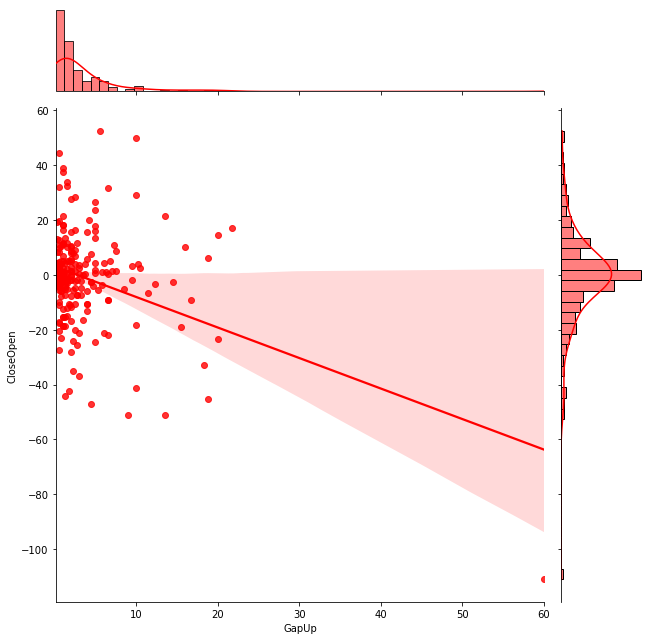

In [36]:
sns.jointplot(x='GapUp', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

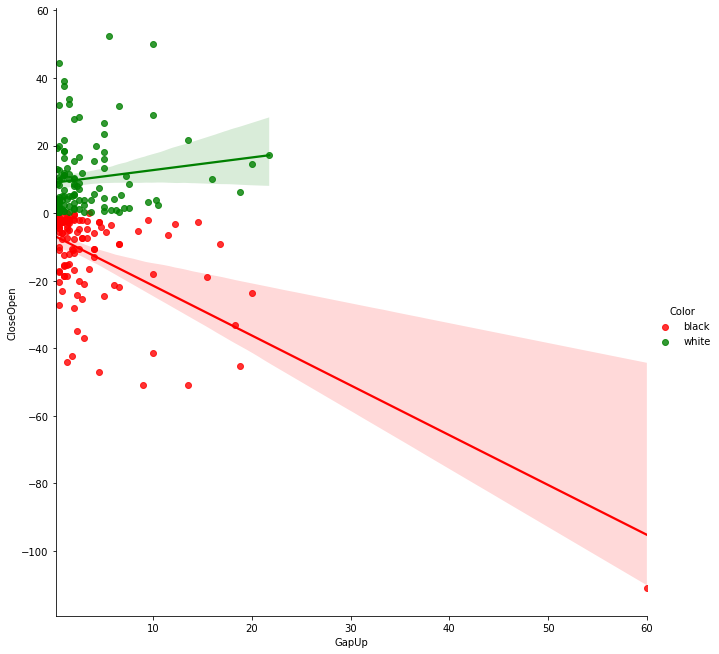

In [37]:
sns.lmplot(x = "GapUp", y = "CloseOpen", height = 9, hue = "Color", data = plot_data, fit_reg = True, 
           palette = dict(white = "green", black = "red"));

In [38]:
plot_data = dataset.iloc[:,:9].copy()
plot_data["GapUpRefilled"] = dataset.GapUpRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,CloseOpenPerc,Delta,Color,GapUp,GapUpRefilled
date_time,,,,,,,,,,
1970-06-15 00:00:00,139.875,140.375,137.250,139.500,-0.38,-0.27,0.500,black,0.250,0.250
1970-07-13 00:00:00,145.500,146.000,142.500,143.500,-2.00,-1.37,2.000,black,1.000,1.000
1970-10-05 00:00:00,172.000,173.125,170.000,170.125,-1.88,-1.09,2.625,black,1.875,1.875
1970-12-28 01:00:00,170.500,170.625,167.375,168.500,-2.00,-1.17,0.375,black,0.125,0.125
1971-04-05 01:00:00,161.875,162.875,159.750,162.250,0.38,0.23,0.500,white,0.250,0.250


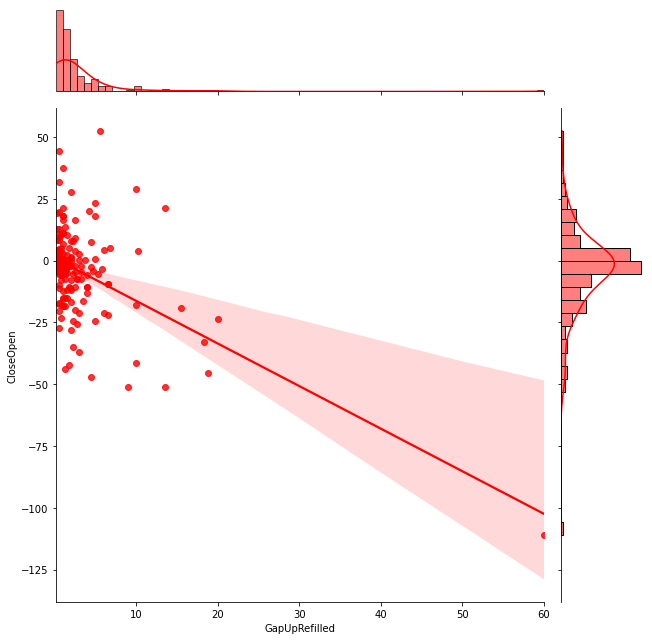

In [39]:
sns.jointplot(x='GapUpRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

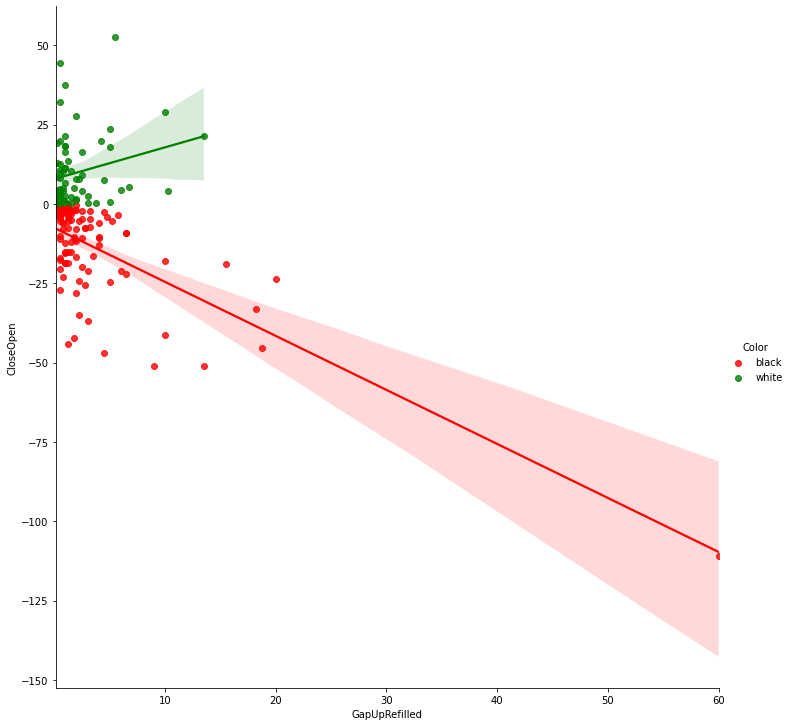

In [40]:
sns.lmplot(x = "GapUpRefilled", y = "CloseOpen", height = 10, hue = "Color", data = plot_data, fit_reg = True, 
           palette = dict(white = "green", black = "red"));

In [41]:
plot_data = dataset.iloc[:,:9].copy()
plot_data["GapUpDeepRefilled"] = dataset.GapUpRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,CloseOpenPerc,Delta,Color,GapUp,GapUpDeepRefilled
date_time,,,,,,,,,,
1970-06-15 00:00:00,139.875,140.375,137.250,139.500,-0.38,-0.27,0.500,black,0.250,0.250
1970-07-13 00:00:00,145.500,146.000,142.500,143.500,-2.00,-1.37,2.000,black,1.000,1.000
1970-10-05 00:00:00,172.000,173.125,170.000,170.125,-1.88,-1.09,2.625,black,1.875,1.875
1970-12-28 01:00:00,170.500,170.625,167.375,168.500,-2.00,-1.17,0.375,black,0.125,0.125
1971-04-05 01:00:00,161.875,162.875,159.750,162.250,0.38,0.23,0.500,white,0.250,0.250


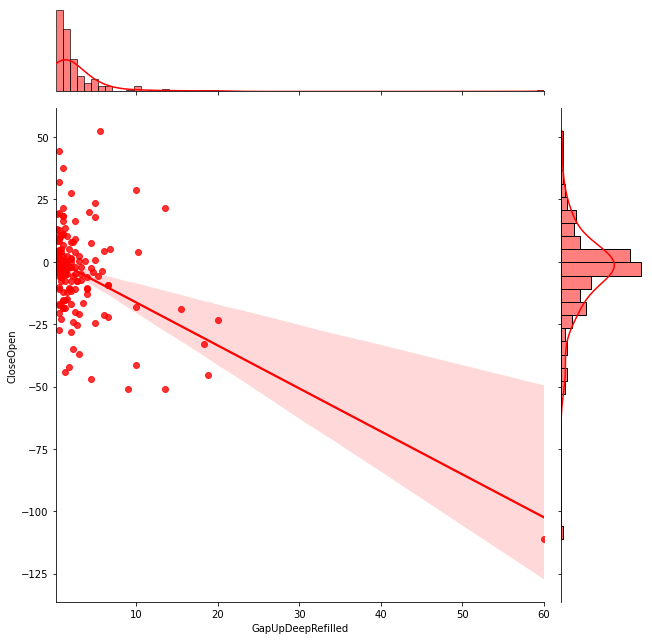

In [42]:
sns.jointplot(x='GapUpDeepRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

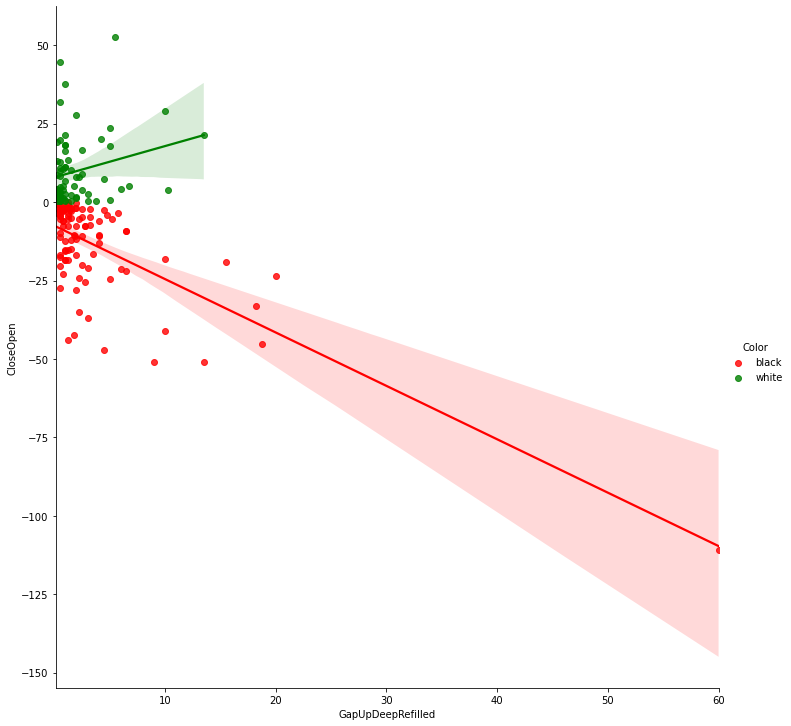

In [43]:
sns.lmplot(x = "GapUpDeepRefilled", y = "CloseOpen", height = 10, hue = "Color", data = plot_data, fit_reg = True, 
           palette = dict(white = "green", black = "red"));

## Gap Down

In [44]:
del dataset

In [45]:
dataset = load_data("CBOT_DL_ZW1!,1W.txt")
dataset['GapUp'] = np.where((dataset.open - dataset.high.shift(1)) > 0, 
                            (dataset.open - dataset.high.shift(1)), np.nan)
dataset['GapDown'] = np.where((dataset.open - dataset.low.shift(1)) < 0,
                              (dataset.open - dataset.low.shift(1)), np.nan)
dataset['GapDownRefilled'] = np.where((dataset.GapDown < 0) & \
                                      (dataset.high > dataset.low.shift(1)), 
                                       dataset.GapDown, np.nan)
dataset['GapDownDeepRefilled'] = np.where((dataset.GapDown < 0) & \
                                          (dataset.high > dataset.close.shift(1)),
                                           dataset.open - dataset.close.shift(1), np.nan)
dataset['GapDownPos'] = np.where((dataset.GapDown < 0) & \
                                 (dataset.close > dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset['GapDownNeg'] = np.where((dataset.GapDown < 0) & \
                                 (dataset.close < dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset.head()

,open,high,low,close,GapUp,GapDown,GapDownRefilled,GapDownDeepRefilled,GapDownPos,GapDownNeg
date_time,,,,,,,,,,
1970-02-02 01:00:00,143.375,145.000,142.875,144.625,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-09 01:00:00,144.750,150.625,144.750,149.875,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-16 01:00:00,145.375,149.250,145.375,148.625,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-23 01:00:00,148.750,149.750,147.000,147.250,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-02 01:00:00,146.750,147.750,145.750,146.375,NaN,-0.25,-0.25,-0.5,NaN,-0.375


In [46]:
gap_down_number = dataset.GapDown.count()
gap_down_perc = round(gap_down_number / dataset.open.count() * 100, 2)
gap_down_entity = round(abs(dataset.GapDown.sum()),2)
gap_down_entity_avg = round(abs(dataset.GapDown.mean()),2)
gap_down_money_avg = round(abs(gap_down_entity_avg * bigpointvalue),2)

gap_down_refilled_number = dataset.GapDownRefilled.count()
gap_down_refilled_perc = round(gap_down_refilled_number / gap_down_number * 100, 2)
gap_down_refilled_entity = round(abs(dataset.GapDownRefilled.sum()),2)
gap_down_refilled_entity_avg = round(abs(dataset.GapDownRefilled.mean()),2)
gap_down_refilled_money_avg = round(abs(gap_down_refilled_entity_avg * bigpointvalue),2)

gap_down_deep_refilled_number = dataset.GapDownDeepRefilled.count()
gap_down_deep_refilled_perc = round(gap_down_deep_refilled_number / gap_down_number * 100, 2)
gap_down_deep_refilled_entity = round(abs(dataset.GapDownDeepRefilled.sum()),2)
gap_down_deep_refilled_entity_avg = round(abs(dataset.GapDownDeepRefilled.mean()),2)
gap_down_deep_refilled_money_avg = round(abs(gap_down_deep_refilled_entity_avg * bigpointvalue),2)

gap_down_pos_number = dataset.GapDownPos.count()
gap_down_pos_perc = round(gap_down_pos_number / gap_down_number * 100, 2)
gap_down_pos_entity = round(dataset.GapDownPos.sum(),2)
gap_down_pos_entity_avg = round(dataset.GapDownPos.mean(),2)
gap_down_pos_money_avg = round(abs(gap_down_pos_entity_avg * bigpointvalue),2)

gap_down_neg_number = dataset.GapDownNeg.count()
gap_down_neg_perc = round(gap_down_neg_number / gap_down_number * 100, 2)
gap_down_neg_entity = round(dataset.GapDownNeg.sum(),2)
gap_down_neg_entity_avg = round(dataset.GapDownNeg.mean(),2)
gap_down_neg_money_avg = round(abs(gap_down_neg_entity_avg * bigpointvalue),2)

In [47]:
print("")
print("    GAP DOWN STATISTICS:")
print("")
print("        Number of Gap Down:                        ", round(gap_down_number,2))
print("        Percentage of Gap Down:                    ", round(gap_down_perc,2), "% of total bars")
print("        Total Entity of Gap Down:                  ", round(gap_down_entity,2),"points")
print("        Average Entity of Gap Down:                ", round(gap_down_entity_avg,2),"points")
print("        Average Money of Gap Down:                 ", round(gap_down_money_avg,2),"$")
print("")
print("        Number of Gap Down Refilled:               ", round(gap_down_refilled_number,2))
print("        Percentage of Gap Down Refilled:           ", round(gap_down_refilled_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Refilled:         ", round(gap_down_refilled_entity,2),"points")
print("        Average Entity of Gap Down Refilled:       ", round(gap_down_refilled_entity_avg,2),"points")
print("        Average Money of Gap Down Refilled:        ", round(gap_down_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Down Deep Refilled:          ", round(gap_down_deep_refilled_number,2))
print("        Percentage of Gap Down Deep Refilled:      ", round(gap_down_deep_refilled_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Deep Refilled:    ", round(gap_down_deep_refilled_entity,2),"points")
print("        Average Entity of Gap Down Deep Refilled:  ", round(gap_down_deep_refilled_entity_avg,2),"points")
print("        Average Money of Gap Down Deep Refilled:   ", round(gap_down_deep_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Down Positive Bars:          ", round(gap_down_pos_number,2))
print("        Percentage of Gap Down Positive Bars:      ", round(gap_down_pos_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Positive Bars:    ", round(gap_down_pos_entity,2),"points")
print("        Average Entity of Gap Down Positive Bars:  ", round(gap_down_pos_entity_avg,2),"points")
print("        Average Money of Gap Down Positive Bars:   ", round(gap_down_pos_money_avg,2),"$")
print("")
print("        Number of Gap Down Negative Bars:          ", round(gap_down_neg_number,2))
print("        Percentage of Gap Down Negative Bars:      ", round(gap_down_neg_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Negative Bars:    ", round(gap_down_neg_entity,2),"points")
print("        Average Entity of Gap Down Negative Bars:  ", round(gap_down_neg_entity_avg,2),"points")
print("        Average Money of Gap Down Negative Bars:   ", round(gap_down_neg_money_avg,2),"$")


    GAP DOWN STATISTICS:

        Number of Gap Down:                         193
        Percentage of Gap Down:                     7.26 % of total bars
        Total Entity of Gap Down:                   554.62 points
        Average Entity of Gap Down:                 2.87 points
        Average Money of Gap Down:                  143.5 $

        Number of Gap Down Refilled:                151
        Percentage of Gap Down Refilled:            78.24 % of gaps down
        Total Entity of Gap Down Refilled:          298.5 points
        Average Entity of Gap Down Refilled:        1.98 points
        Average Money of Gap Down Refilled:         99.0 $

        Number of Gap Down Deep Refilled:           132
        Percentage of Gap Down Deep Refilled:       68.39 % of gaps down
        Total Entity of Gap Down Deep Refilled:     405.38 points
        Average Entity of Gap Down Deep Refilled:   3.07 points
        Average Money of Gap Down Deep Refilled:    153.5 $

        Number 

In [48]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["GapDown"] = dataset.GapDown
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,GapDown
date_time,,,,,,
1970-03-02 01:00:00,146.75,147.750,145.750,146.375,-0.375,-0.250
1970-05-04 00:00:00,141.00,141.125,136.250,137.375,-3.625,-0.500
1970-12-14 01:00:00,165.75,168.875,164.625,168.500,2.750,-0.125
1971-02-15 01:00:00,165.25,165.625,163.250,164.125,-1.125,-3.375
1971-03-15 01:00:00,161.50,162.250,157.750,159.250,-2.250,-0.500


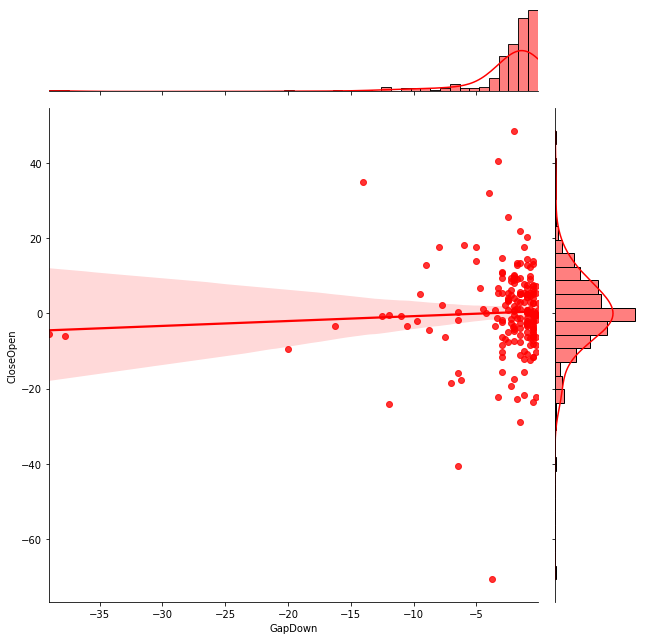

In [49]:
sns.jointplot(x='GapDown', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [50]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["GapDownRefilled"] = dataset.GapDownRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,GapDownRefilled
date_time,,,,,,
1970-03-02 01:00:00,146.75,147.750,145.750,146.375,-0.375,-0.250
1970-12-14 01:00:00,165.75,168.875,164.625,168.500,2.750,-0.125
1971-03-15 01:00:00,161.50,162.250,157.750,159.250,-2.250,-0.500
1971-04-26 00:00:00,151.75,152.750,149.375,151.750,0.000,-0.625
1971-07-05 00:00:00,154.50,156.250,151.750,152.000,-2.500,-1.500


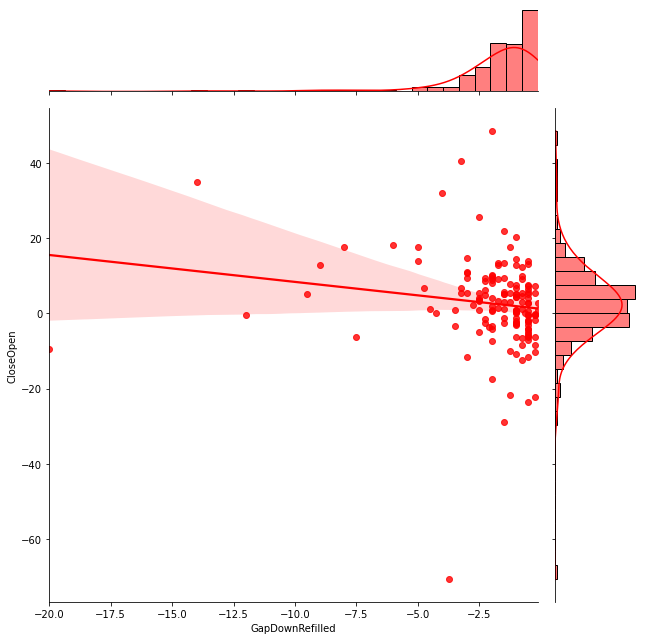

In [51]:
sns.jointplot(x='GapDownRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [52]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["GapDownDeepRefilled"] = dataset.GapDownDeepRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,GapDownDeepRefilled
date_time,,,,,,
1970-03-02 01:00:00,146.75,147.750,145.750,146.375,-0.375,-0.500
1970-12-14 01:00:00,165.75,168.875,164.625,168.500,2.750,-1.750
1971-07-12 00:00:00,150.50,156.375,150.250,156.000,5.500,-1.500
1971-09-13 00:00:00,145.00,148.250,143.000,143.375,-1.625,-2.375
1972-01-10 01:00:00,160.00,167.500,159.750,167.500,7.500,-1.125


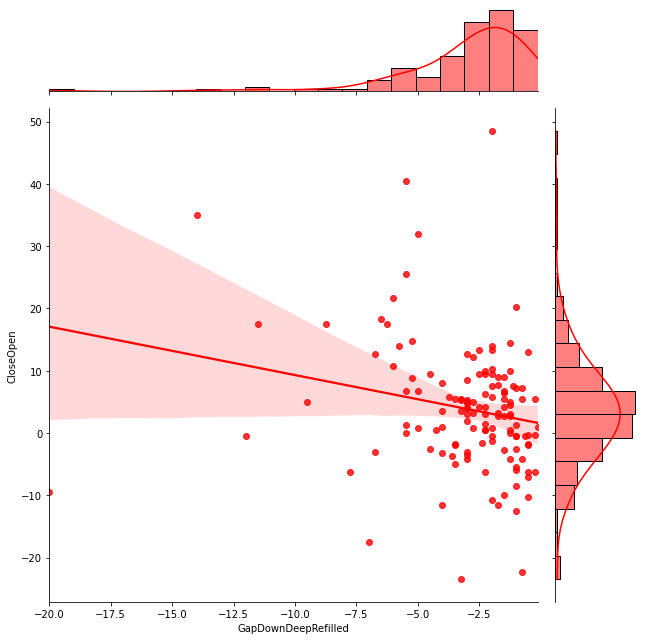

In [53]:
sns.jointplot(x='GapDownDeepRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

## Lap Up

In [54]:
del dataset

In [55]:
dataset = load_data("CBOT_DL_ZW1!,1W.txt")
dataset['LapDown'] = np.where((dataset.open < dataset.close.shift(1)) & \
                              (dataset.open >= dataset.low.shift(1)), 
                              (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapUp'] = np.where((dataset.open > dataset.close.shift(1)) & \
                            (dataset.open <= dataset.high.shift(1)), 
                            (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapUpRefilled'] = np.where((dataset.LapUp > 0) & \
                                    (dataset.low < dataset.close.shift(1)), 
                                     dataset.LapUp, np.nan)
dataset['LapUpPos'] = np.where((dataset.LapUp > 0) & \
                               (dataset.close > dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset['LapUpNeg'] = np.where((dataset.LapUp > 0) & \
                               (dataset.close < dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset.head(10)

,open,high,low,close,LapDown,LapUp,LapUpRefilled,LapUpPos,LapUpNeg
date_time,,,,,,,,,
1970-02-02 01:00:00,143.375,145.000,142.875,144.625,NaN,NaN,NaN,NaN,NaN
1970-02-09 01:00:00,144.750,150.625,144.750,149.875,NaN,0.125,NaN,5.125,NaN
1970-02-16 01:00:00,145.375,149.250,145.375,148.625,-4.500,NaN,NaN,NaN,NaN
1970-02-23 01:00:00,148.750,149.750,147.000,147.250,NaN,0.125,0.125,NaN,-1.5
1970-03-02 01:00:00,146.750,147.750,145.750,146.375,NaN,NaN,NaN,NaN,NaN
1970-03-09 01:00:00,146.250,148.250,144.875,147.125,-0.125,NaN,NaN,NaN,NaN
1970-03-16 01:00:00,146.750,147.625,142.875,143.250,-0.375,NaN,NaN,NaN,NaN
1970-03-23 01:00:00,143.000,145.625,143.000,145.375,-0.250,NaN,NaN,NaN,NaN
1970-03-30 01:00:00,145.375,145.500,143.625,145.125,NaN,NaN,NaN,NaN,NaN


In [56]:
lap_up_number = dataset.LapUp.count()
lap_up_perc = round(lap_up_number / dataset.open.count() * 100, 2)
lap_up_entity = round(dataset.LapUp.sum(),2)
lap_up_entity_avg = round(dataset.LapUp.mean(),2)
lap_up_money_avg = round(abs(lap_up_entity_avg * bigpointvalue),2)

lap_up_refilled_number = dataset.LapUpRefilled.count()
lap_up_refilled_perc = round(lap_up_refilled_number / lap_up_number * 100, 2)
lap_up_refilled_entity = round(dataset.LapUpRefilled.sum(),2)
lap_up_refilled_entity_avg = round(dataset.LapUpRefilled.mean(),2)
lap_up_refilled_money_avg = round(abs(lap_up_refilled_entity_avg * bigpointvalue),2)

lap_up_pos_number = dataset.LapUpPos.count()
lap_up_pos_perc = round(lap_up_pos_number / lap_up_number * 100, 2)
lap_up_pos_entity = round(dataset.LapUpPos.sum(),2)
lap_up_pos_entity_avg = round(dataset.LapUpPos.mean(),2)
lap_up_pos_money_avg = round(abs(lap_up_pos_entity_avg * bigpointvalue),2)

lap_up_neg_number = dataset.LapUpNeg.count()
lap_up_neg_perc = round(lap_up_neg_number / lap_up_number * 100, 2)
lap_up_neg_entity = round(dataset.LapUpNeg.sum(),2)
lap_up_neg_entity_avg = round(dataset.LapUpNeg.mean(),2)
lap_up_neg_money_avg = round(abs(lap_up_neg_entity_avg * bigpointvalue),2)

In [57]:
print("")
print("    LAP UP STATISTICS:")
print("")
print("        Number of Lap Up:                          ", round(lap_up_number,2))
print("        Percentage of Lap Up:                      ", round(lap_up_perc,2), "% of total bars")
print("        Total Entity of Lap Up:                    ", round(lap_up_entity,2),"points")
print("        Average Entity of Lap Up:                  ", round(lap_up_entity_avg,2),"points")
print("        Average Money of Lap Up:                   ", round(lap_up_money_avg,2),"$")
print("")
print("        Number of Lap Up Refilled:                 ", round(lap_up_refilled_number,2))
print("        Percentage of Lap Up Refilled:             ", round(lap_up_refilled_perc,2), "% of laps up")
print("        Total Entity of Lap Up Refilled:           ", round(lap_up_refilled_entity,2),"points")
print("        Average Entity of Lap Up Refilled:         ", round(lap_up_refilled_entity_avg,2),"points")
print("        Average Money of Lap Up Refilled:          ", round(lap_up_refilled_money_avg,2),"$")
print("")
print("        Number of Lap Up Positive Bars:            ", round(lap_up_pos_number,2))
print("        Percentage of Lap Up Positive Bars:        ", round(lap_up_pos_perc,2), "% of laps up")
print("        Total Entity of Lap Up Positive Bars:      ", round(lap_up_pos_entity,2),"points")
print("        Average Entity of Lap Up Positive Bars:    ", round(lap_up_pos_entity_avg,2),"points")
print("        Average Money of Lap Up Positive Bars:     ", round(lap_up_pos_money_avg,2),"$")
print("")
print("        Number of Lap Up Negative Bars:            ", round(lap_up_neg_number,2))
print("        Percentage of Lap Up Negative Bars:        ", round(lap_up_neg_perc,2), "% of laps up")
print("        Total Entity of Lap Up Negative Bars:      ", round(lap_up_neg_entity,2),"points")
print("        Average Entity of Lap Up Negative Bars:    ", round(lap_up_neg_entity_avg,2),"points")
print("        Average Money of Lap Up Negative Bars:     ", round(lap_up_neg_money_avg,2),"$")


    LAP UP STATISTICS:

        Number of Lap Up:                           966
        Percentage of Lap Up:                       36.36 % of total bars
        Total Entity of Lap Up:                     2133.0 points
        Average Entity of Lap Up:                   2.21 points
        Average Money of Lap Up:                    110.5 $

        Number of Lap Up Refilled:                  784
        Percentage of Lap Up Refilled:              81.16 % of laps up
        Total Entity of Lap Up Refilled:            1423.0 points
        Average Entity of Lap Up Refilled:          1.82 points
        Average Money of Lap Up Refilled:           91.0 $

        Number of Lap Up Positive Bars:             498
        Percentage of Lap Up Positive Bars:         51.55 % of laps up
        Total Entity of Lap Up Positive Bars:       6634.0 points
        Average Entity of Lap Up Positive Bars:     13.32 points
        Average Money of Lap Up Positive Bars:      666.0 $

        Number of 

In [58]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapUp"] = dataset.LapUp
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapUp
date_time,,,,,,
1970-02-09 01:00:00,144.750,150.625,144.750,149.875,5.125,0.125
1970-02-23 01:00:00,148.750,149.750,147.000,147.250,-1.500,0.125
1970-05-25 00:00:00,138.000,138.250,134.000,134.500,-3.500,0.125
1970-06-01 00:00:00,134.625,136.000,134.125,134.625,0.000,0.125
1970-07-06 00:00:00,139.750,144.500,139.750,143.500,3.750,0.250


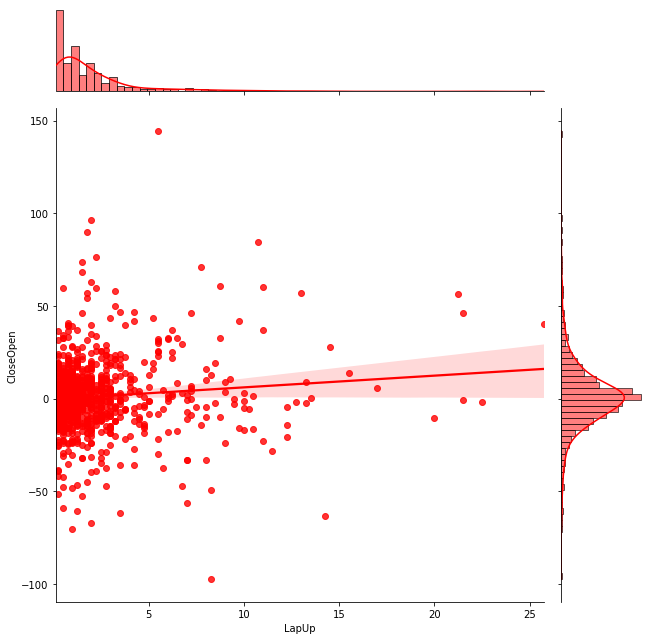

In [59]:
sns.jointplot(x='LapUp', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [60]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapUpRefilled"] = dataset.LapUpRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapUpRefilled
date_time,,,,,,
1970-02-23 01:00:00,148.750,149.75,147.000,147.250,-1.50,0.125
1970-05-25 00:00:00,138.000,138.25,134.000,134.500,-3.50,0.125
1970-06-01 00:00:00,134.625,136.00,134.125,134.625,0.00,0.125
1970-07-27 00:00:00,147.375,149.00,145.750,147.125,-0.25,0.875
1970-08-10 00:00:00,146.500,150.25,145.875,149.750,3.25,0.125


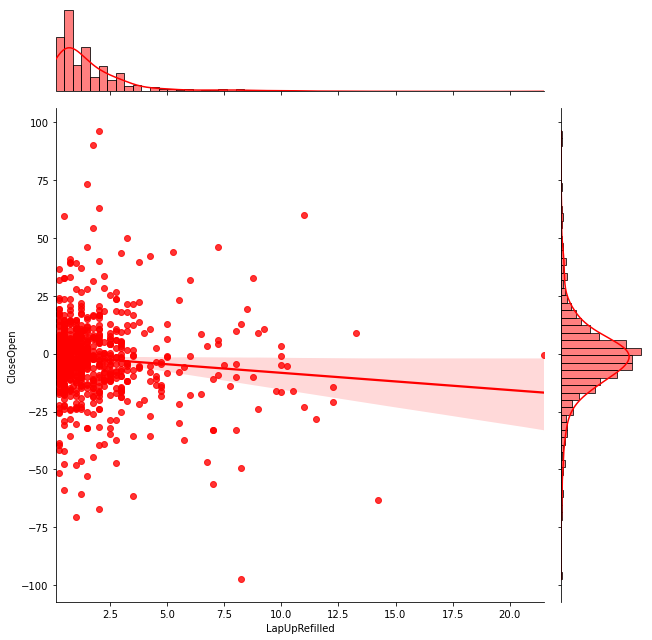

In [61]:
sns.jointplot(x='LapUpRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

## Lap Down

In [62]:
del dataset

In [63]:
dataset = load_data("CBOT_DL_ZW1!,1W.txt")
dataset['LapUp'] = np.where((dataset.open > dataset.close.shift(1)) & \
                            (dataset.open <= dataset.high.shift(1)), 
                            (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapDown'] = np.where((dataset.open < dataset.close.shift(1)) & \
                              (dataset.open >= dataset.low.shift(1)), 
                              (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapDownRefilled'] = np.where((dataset.LapDown < 0) & \
                                      (dataset.high > dataset.close.shift(1)),
                                       dataset.LapDown, np.nan)
dataset['LapDownPos'] = np.where((dataset.LapDown < 0) & \
                                 (dataset.close > dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset['LapDownNeg'] = np.where((dataset.LapDown < 0) & \
                                 (dataset.close < dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset.head(10)

,open,high,low,close,LapUp,LapDown,LapDownRefilled,LapDownPos,LapDownNeg
date_time,,,,,,,,,
1970-02-02 01:00:00,143.375,145.000,142.875,144.625,NaN,NaN,NaN,NaN,NaN
1970-02-09 01:00:00,144.750,150.625,144.750,149.875,0.125,NaN,NaN,NaN,NaN
1970-02-16 01:00:00,145.375,149.250,145.375,148.625,NaN,-4.500,NaN,3.250,NaN
1970-02-23 01:00:00,148.750,149.750,147.000,147.250,0.125,NaN,NaN,NaN,NaN
1970-03-02 01:00:00,146.750,147.750,145.750,146.375,NaN,NaN,NaN,NaN,NaN
1970-03-09 01:00:00,146.250,148.250,144.875,147.125,NaN,-0.125,-0.125,0.875,NaN
1970-03-16 01:00:00,146.750,147.625,142.875,143.250,NaN,-0.375,-0.375,NaN,-3.5
1970-03-23 01:00:00,143.000,145.625,143.000,145.375,NaN,-0.250,-0.250,2.375,NaN
1970-03-30 01:00:00,145.375,145.500,143.625,145.125,NaN,NaN,NaN,NaN,NaN


In [64]:
lap_down_number = dataset.LapDown.count()
lap_down_perc = round(lap_down_number / dataset.open.count() * 100, 2)
lap_down_entity = round(abs(dataset.LapDown.sum()),2)
lap_down_entity_avg = round(abs(dataset.LapDown.mean()),2)
lap_down_money_avg = round(abs(lap_down_entity_avg * bigpointvalue),2)

lap_down_refilled_number = dataset.LapDownRefilled.count()
lap_down_refilled_perc = round(lap_down_refilled_number / lap_down_number * 100, 2)
lap_down_refilled_entity = round(abs(dataset.LapDownRefilled.sum()),2)
lap_down_refilled_entity_avg = round(abs(dataset.LapDownRefilled.mean()),2)
lap_down_refilled_money_avg = round(abs(lap_down_refilled_entity_avg * bigpointvalue),2)

lap_down_pos_number = dataset.LapDownPos.count()
lap_down_pos_perc = round(lap_down_pos_number / lap_down_number * 100, 2)
lap_down_pos_entity = round(dataset.LapDownPos.sum(),2)
lap_down_pos_entity_avg = round(dataset.LapDownPos.mean(),2)
lap_down_pos_money_avg = round(abs(lap_down_pos_entity_avg * bigpointvalue),2)

lap_down_neg_number = dataset.LapDownNeg.count()
lap_down_neg_perc = round(lap_down_neg_number / lap_down_number * 100, 2)
lap_down_neg_entity = round(dataset.LapDownNeg.sum(),2)
lap_down_neg_entity_avg = round(dataset.LapDownNeg.mean(),2)
lap_down_neg_money_avg = round(abs(lap_down_neg_entity_avg * bigpointvalue),2)

In [65]:
print("")
print("    LAP DOWN STATISTICS:")
print("")
print("        Number of Lap Down:                        ", round(lap_down_number,2))
print("        Percentage of Lap Down:                    ", round(lap_down_perc,2), "% of total bars")
print("        Total Entity of Lap Down:                  ", round(lap_down_entity,2),"points")
print("        Average Entity of Lap Down:                ", round(lap_down_entity_avg,2),"points")
print("        Average Money of Lap Down:                 ", round(lap_down_money_avg,2),"$")
print("")
print("        Number of Lap Down Refilled:               ", round(lap_down_refilled_number,2))
print("        Percentage of Lap Down Refilled:           ", round(lap_down_refilled_perc,2), "% of laps down")
print("        Total Entity of Lap Down Refilled:         ", round(lap_down_refilled_entity,2),"points")
print("        Average Entity of Lap Down Refilled:       ", round(lap_down_refilled_entity_avg,2),"points")
print("        Average Money of Lap Down Refilled:        ", round(lap_down_refilled_money_avg,2),"$")
print("")
print("        Number of Lap Down Positive Bars:          ", round(lap_down_pos_number,2))
print("        Percentage of Lap Down Positive Bars:      ", round(lap_down_pos_perc,2), "% of laps down")
print("        Total Entity of Lap Down Positive Bars:    ", round(lap_down_pos_entity,2),"points")
print("        Average Entity of Lap Down Positive Bars:  ", round(lap_down_pos_entity_avg,2),"points")
print("        Average Money of Lap Down Positive Bars:   ", round(lap_down_pos_money_avg,2),"$")
print("")
print("        Number of Lap Down Negative Bars:          ", round(lap_down_neg_number,2))
print("        Percentage of Lap Down Negative Bars:      ", round(lap_down_neg_perc,2), "% of laps down")
print("        Total Entity of Lap Down Negative Bars:    ", round(lap_down_neg_entity,2),"points")
print("        Average Entity of Lap Down Negative Bars:  ", round(lap_down_neg_entity_avg,2),"points")
print("        Average Money of Lap Down Negative Bars:   ", round(lap_down_neg_money_avg,2),"$")


    LAP DOWN STATISTICS:

        Number of Lap Down:                         1042
        Percentage of Lap Down:                     39.22 % of total bars
        Total Entity of Lap Down:                   1920.25 points
        Average Entity of Lap Down:                 1.84 points
        Average Money of Lap Down:                  92.0 $

        Number of Lap Down Refilled:                859
        Percentage of Lap Down Refilled:            82.44 % of laps down
        Total Entity of Lap Down Refilled:          1405.25 points
        Average Entity of Lap Down Refilled:        1.64 points
        Average Money of Lap Down Refilled:         82.0 $

        Number of Lap Down Positive Bars:           496
        Percentage of Lap Down Positive Bars:       47.6 % of laps down
        Total Entity of Lap Down Positive Bars:     5368.38 points
        Average Entity of Lap Down Positive Bars:   10.82 points
        Average Money of Lap Down Positive Bars:    541.0 $

        Nu

In [66]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapDown"] = dataset.LapDown
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapDown
date_time,,,,,,
1970-02-16 01:00:00,145.375,149.250,145.375,148.625,3.250,-4.500
1970-03-09 01:00:00,146.250,148.250,144.875,147.125,0.875,-0.125
1970-03-16 01:00:00,146.750,147.625,142.875,143.250,-3.500,-0.375
1970-03-23 01:00:00,143.000,145.625,143.000,145.375,2.375,-0.250
1970-04-06 01:00:00,145.000,148.125,145.000,146.375,1.375,-0.125


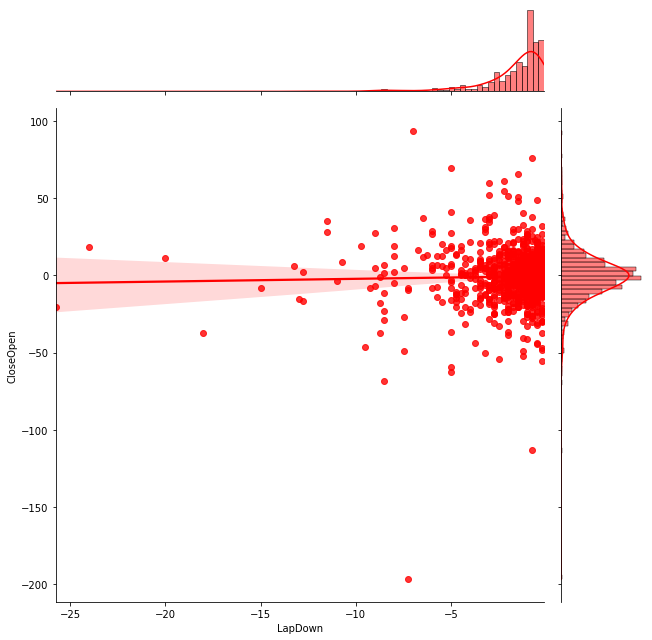

In [67]:
sns.jointplot(x='LapDown', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [68]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapDownRefilled"] = dataset.LapDownRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapDownRefilled
date_time,,,,,,
1970-03-09 01:00:00,146.25,148.250,144.875,147.125,0.875,-0.125
1970-03-16 01:00:00,146.75,147.625,142.875,143.250,-3.500,-0.375
1970-03-23 01:00:00,143.00,145.625,143.000,145.375,2.375,-0.250
1970-04-06 01:00:00,145.00,148.125,145.000,146.375,1.375,-0.125
1970-04-13 01:00:00,146.25,150.250,138.875,139.250,-7.000,-0.125


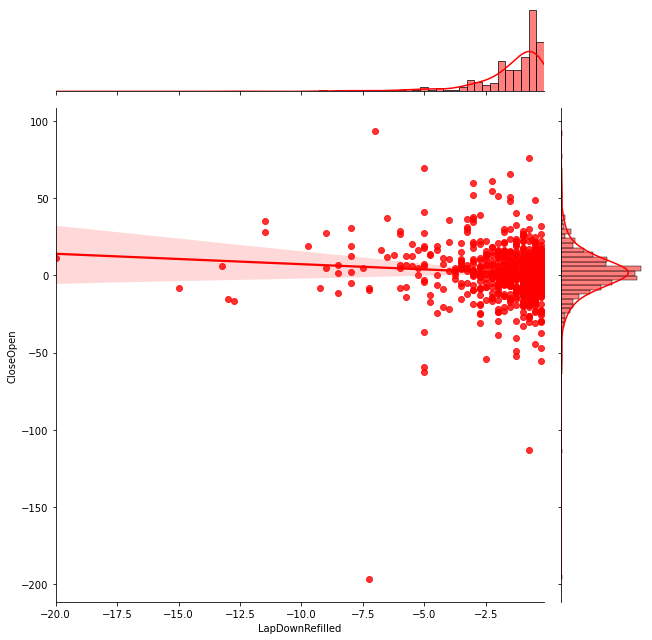

In [69]:
sns.jointplot(x='LapDownRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');